In [5]:
import pandas as pd

In [7]:
#importing the data
df = pd.read_csv("Auction_Export")
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Year,Brand,Model,State,Milage,Lot,Price
0,2014,JEEP,GRAND,Michigan,141611.0,206958611,3250
1,2014,HONDA,ACCORD,Michigan,262803.0,206958621,1425
2,1999,HONDA,CR-V,Michigan,214984.0,206958645,425
3,2011,HYUNDAI,SONATA,Michigan,171272.0,206958649,900
4,2001,HONDA,CR-V,Michigan,218334.0,206958650,500


In [9]:
df.shape

(5013, 7)

In [11]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    5013 non-null   int64  
 1   Brand   5013 non-null   object 
 2   Model   5005 non-null   object 
 3   State   5013 non-null   object 
 4   Milage  4969 non-null   float64
 5   Lot     5013 non-null   int64  
 6   Price   5013 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 274.3+ KB


In [13]:
#for consistency in the values
df.Brand = df["Brand"].apply(lambda x: x.upper())
df.Model = df["Model"].apply(lambda x: str(x))
df.Model = df["Model"].apply(lambda x: x.upper())

In [17]:
df.isna().sum()

Year       0
Brand      0
Model      0
State      0
Milage    44
Lot        0
Price      0
dtype: int64

In [21]:
df = df.dropna()

In [23]:
#removing any duplicates
df = df.drop_duplicates()

In [25]:
df = df[df["Milage"] != 1]

In [31]:
#Reducing the data to include only the top 15 Brands
brands = df.groupby(["Brand"]).count().drop(columns = ["State", "Milage", "Lot", "Price", "Model"]).sort_values(by = "Year", ascending = False)
brands.reset_index(inplace = True)
top_brands = brands.head(15)
top_brands

,Brand,Year
0,FORD,541
1,CHEVROLET,379
2,HONDA,303
3,KIA,149
4,HYUNDAI,137
5,DODGE,127
6,JEEP,109
7,BMW,74
8,GMC,72
9,MERCEDES-BENZ,66


In [73]:
brands_list = list(top_brands.Brand)

In [75]:
data = df[df["Brand"].isin(brands_list)]

In [77]:
#Reducing the data to only include models that appear at least 10 times
models = data.groupby("Model").count().drop(columns = ["Brand", "State", "Milage", "Lot", "Price"]).reset_index()

In [79]:
top_models = models[models["Year"]>9]

In [81]:
model_list = list(top_models["Model"])

In [83]:
data = data[data["Model"].isin(model_list)]

In [85]:
data

,Year,Brand,Model,State,Milage,Lot,Price
0,2014,JEEP,GRAND,Michigan,141611.0,206958611,3250
1,2014,HONDA,ACCORD,Michigan,262803.0,206958621,1425
2,1999,HONDA,CR-V,Michigan,214984.0,206958645,425
3,2011,HYUNDAI,SONATA,Michigan,171272.0,206958649,900
4,2001,HONDA,CR-V,Michigan,218334.0,206958650,500
...,...,...,...,...,...,...,...
4998,2005,HONDA,ACCORD,California,185646.0,206887076,800
5000,2013,KIA,SOUL,Nevada,92205.0,206920178,1225
5001,2012,CHEVROLET,EQUINOX,Oklahoma,197246.0,206846785,625
5003,2003,HONDA,ACCORD,California,227957.0,206887080,525


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

## Handling Outliers

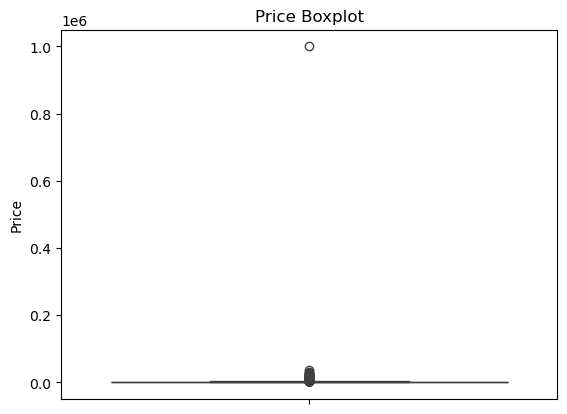

In [89]:
sns.boxplot(data["Price"])
plt.title("Price Boxplot")
plt.show()

In [91]:
price_upper_limit = data["Price"].mean() + 3*data["Price"].std()
price_lower_limit = data["Price"].mean() - 3*data["Price"].std()
price_lower_limit

-72439.61581031253

In [95]:
data = data[data["Price"] < price_upper_limit]

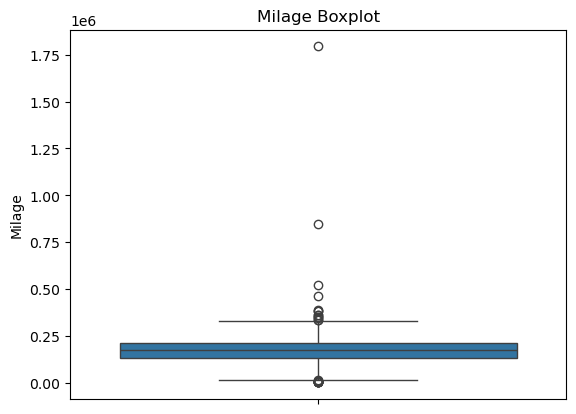

In [97]:
sns.boxplot(data["Milage"])
plt.title("Milage Boxplot")
plt.show()

In [99]:
Milage_upper_limit = data["Milage"].mean() + 3*data["Milage"].std()
Milage_lower_limit = data["Milage"].mean() - 3*data["Milage"].std()
Milage_lower_limit

-51106.62022017824

In [101]:
data = data[data["Milage"] < Milage_upper_limit]

In [103]:
data

,Year,Brand,Model,State,Milage,Lot,Price
0,2014,JEEP,GRAND,Michigan,141611.0,206958611,3250
1,2014,HONDA,ACCORD,Michigan,262803.0,206958621,1425
2,1999,HONDA,CR-V,Michigan,214984.0,206958645,425
3,2011,HYUNDAI,SONATA,Michigan,171272.0,206958649,900
4,2001,HONDA,CR-V,Michigan,218334.0,206958650,500
...,...,...,...,...,...,...,...
4998,2005,HONDA,ACCORD,California,185646.0,206887076,800
5000,2013,KIA,SOUL,Nevada,92205.0,206920178,1225
5001,2012,CHEVROLET,EQUINOX,Oklahoma,197246.0,206846785,625
5003,2003,HONDA,ACCORD,California,227957.0,206887080,525


In [105]:
data.to_csv("Auction_export_cleaned")